#### Importing the necessary libraries

In [311]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

#### loading the dataset

In [312]:
titanic_train = pd.read_csv(r'C:\Users\ADMIN\Desktop\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv')

In [313]:
len(titanic_train)

891

In [314]:
df = titanic_train.copy()

In [315]:
len(df)

891

In [316]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Removing the irrelevant features

In [317]:
X = df.drop(['Cabin','Embarked','Ticket','PassengerId','Name','Survived'],axis = 1)

In [318]:
type(X)

pandas.core.frame.DataFrame

In [319]:
X['Age'].isna().sum()

177

In [320]:
y = df['Survived']

In [321]:
X.isna().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

In [322]:
X['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [323]:
X['Age'].median()

28.0

In [324]:
X['Age'].mean()

29.69911764705882

In [325]:
X['Age'].mode()

0    24.0
dtype: float64

<AxesSubplot:>

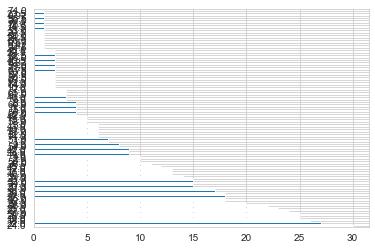

In [326]:
X['Age'].value_counts().plot(kind  = 'barh')

<AxesSubplot:ylabel='Age'>

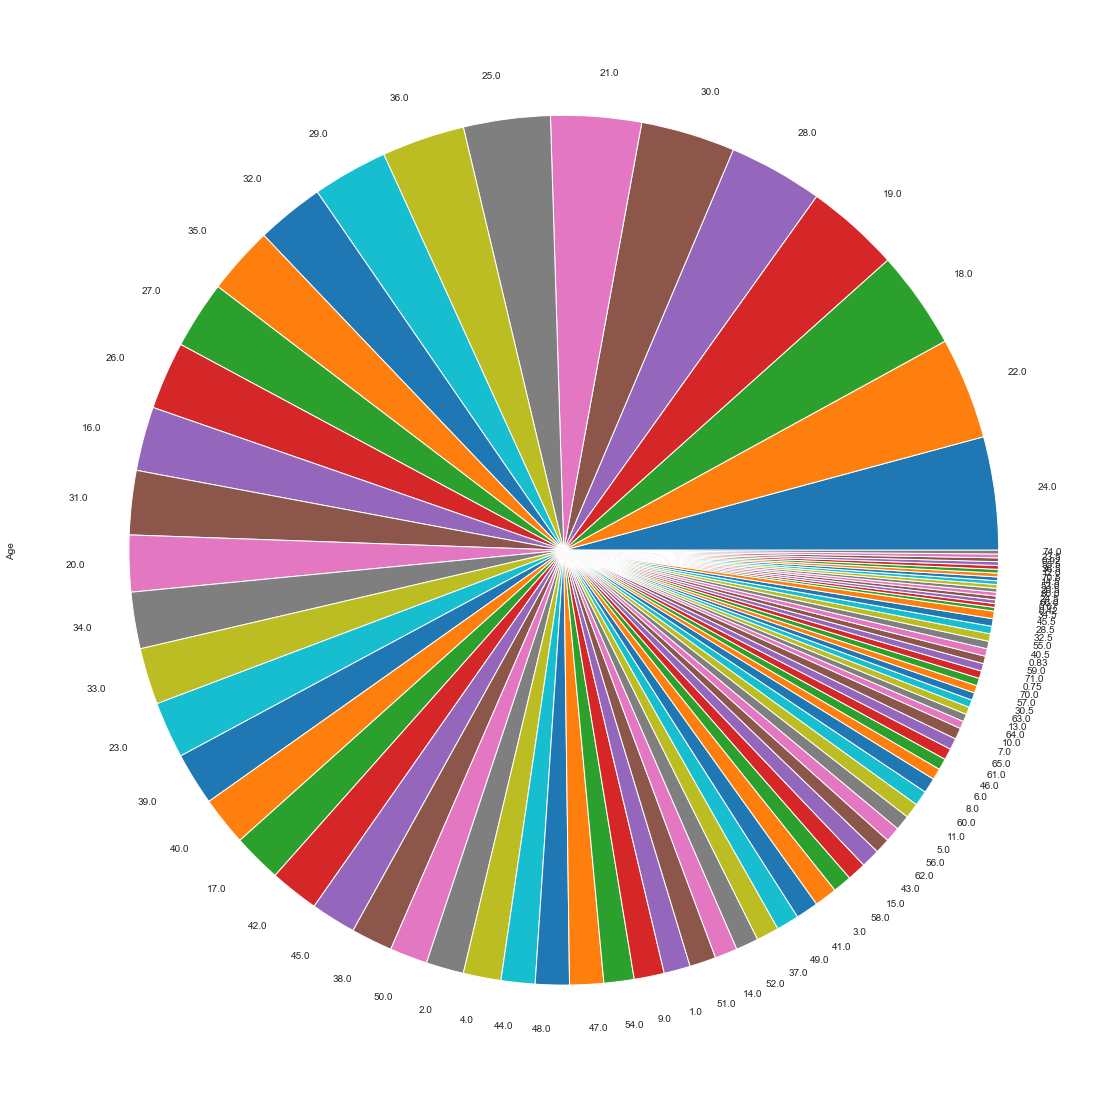

In [327]:
plt.figure(figsize=(50,20))
X.Age.value_counts().plot(kind='pie')

<AxesSubplot:>

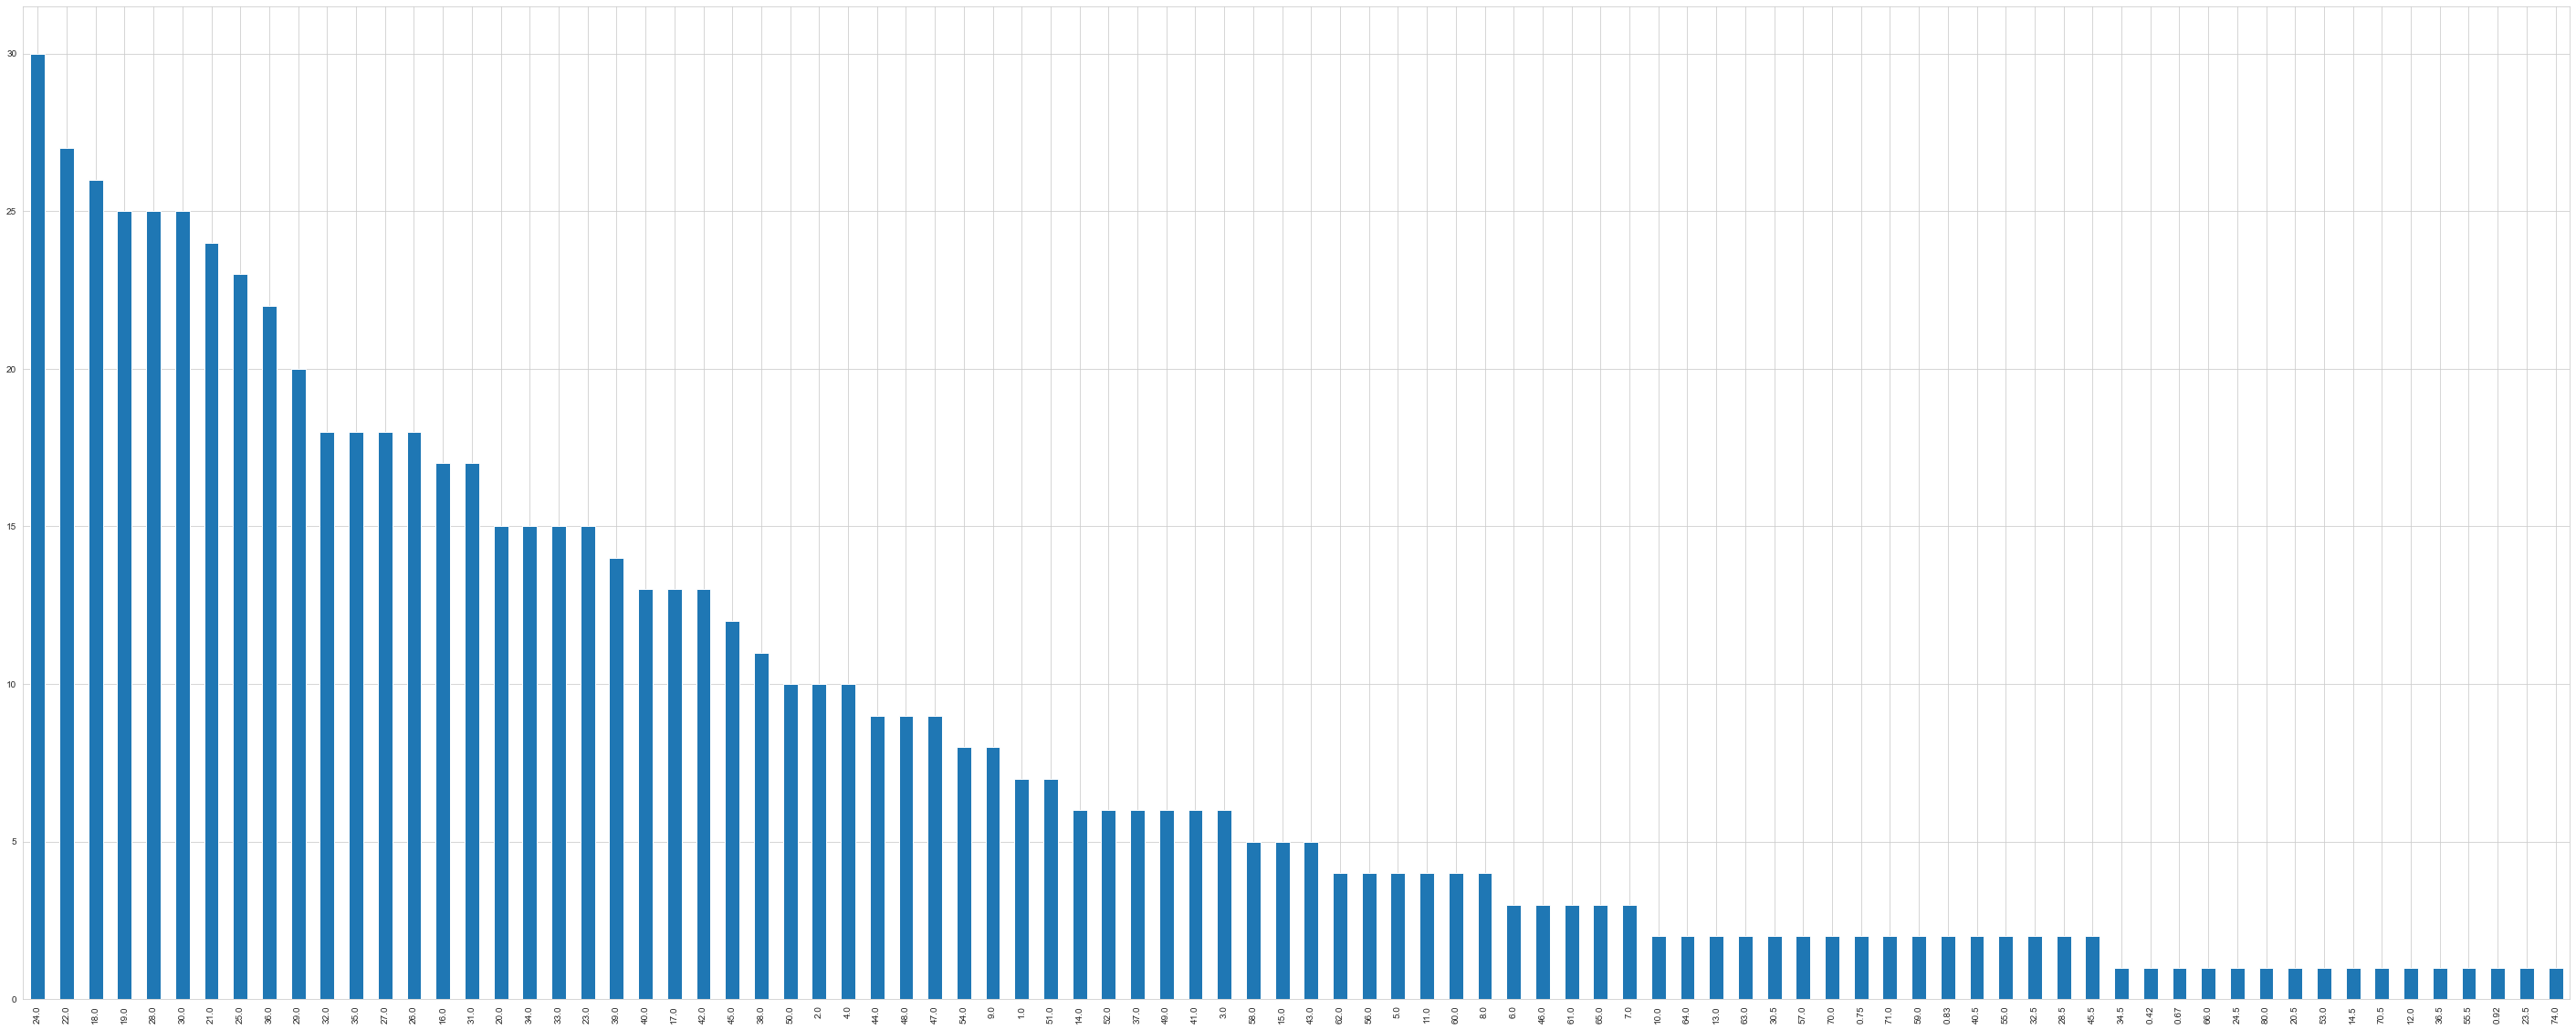

In [328]:
plt.figure(figsize=(50,20))
X.Age.value_counts().plot(kind='bar')

<AxesSubplot:>

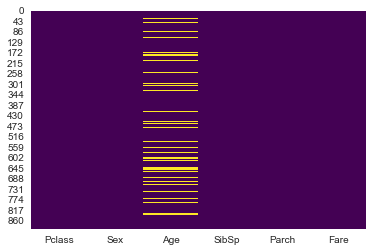

In [329]:
sns.heatmap(X.isnull(),cbar = False,cmap = 'viridis')

In [330]:
X['Age'].isnull().sum()

177

In [331]:
X['Age'].isnull().sum()

177

<AxesSubplot:xlabel='Survived', ylabel='count'>

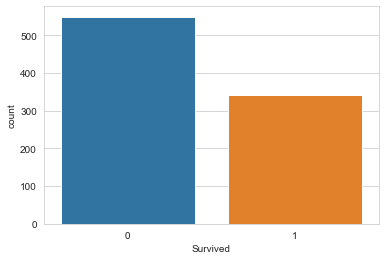

In [332]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

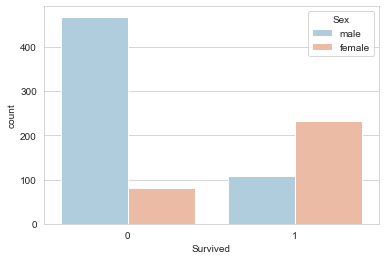

In [333]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Sex',data = df,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

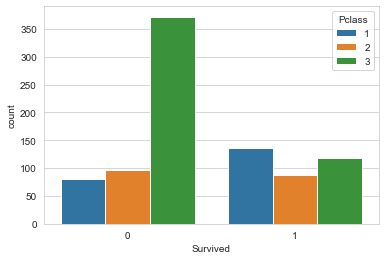

In [334]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass',data = df)

#### Figuring out how to remove the null values for Age

<AxesSubplot:>

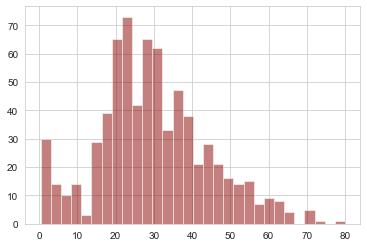

In [335]:
titanic_train['Age'].hist(bins=30,color='darkred',alpha=0.5)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

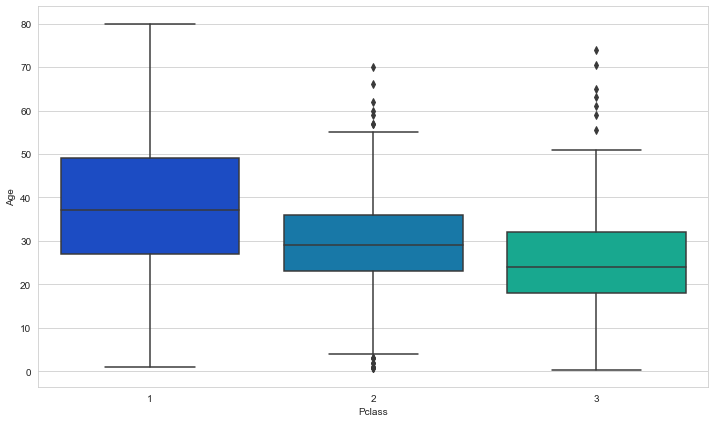

In [336]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass',y = 'Age',data = df,palette = 'winter')

#### Replacing the null values of Age by referencing the Pclass and finding out the average age of a person in that class.Refer the above box plot for details which will explain the code below.

In [337]:
'''
for i in range(0,len(X)):
    if X['Pclass'][i] == 1 and np.isnan(X['Age'][i]) == True:
        X.Age[i] = 38
        #print(i)
    elif X['Pclass'][i] == 2 and np.isnan(X['Age'][i]) == True:
        X.Age[i] = 29
        #print(i)
    elif X['Pclass'][i] == 3 and np.isnan(X['Age'][i]) == True:
        X.Age[i] = 24
        #print(i)
'''

"\nfor i in range(0,len(X)):\n    if X['Pclass'][i] == 1 and np.isnan(X['Age'][i]) == True:\n        X.Age[i] = 38\n        #print(i)\n    elif X['Pclass'][i] == 2 and np.isnan(X['Age'][i]) == True:\n        X.Age[i] = 29\n        #print(i)\n    elif X['Pclass'][i] == 3 and np.isnan(X['Age'][i]) == True:\n        X.Age[i] = 24\n        #print(i)\n"

In [338]:
def Replace_Null_Values_of_Age(DataFrame):
    y = DataFrame.copy()
    for i in range(0,len(y)):
        if y['Pclass'][i] == 1 and np.isnan(y['Age'][i]) == True:
            y.Age[i] = 38
        elif y['Pclass'][i] == 2 and np.isnan(y['Age'][i]) == True:
            y.Age[i] = 29
        elif y['Pclass'][i] == 3 and np.isnan(y['Age'][i]) == True:
            y.Age[i] = 24

    return y

In [339]:
X = Replace_Null_Values_of_Age(X)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10316/1194587515.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Age[i] = 24
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10316/1194587515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Age[i] = 29
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_10316/1194587515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Age[i] = 38


In [340]:
X

Pclass     Sex   Age  SibSp  Parch     Fare
0         3    male  22.0      1      0   7.2500
1         1  female  38.0      1      0  71.2833
2         3  female  26.0      0      0   7.9250
3         1  female  35.0      1      0  53.1000
4         3    male  35.0      0      0   8.0500
..      ...     ...   ...    ...    ...      ...
886       2    male  27.0      0      0  13.0000
887       1  female  19.0      0      0  30.0000
888       3  female  24.0      1      2  23.4500
889       1    male  26.0      0      0  30.0000
890       3    male  32.0      0      0   7.7500

[891 rows x 6 columns]

#### Verifying if there are any null values

In [341]:
X['Age'].isna().sum()

0

<AxesSubplot:>

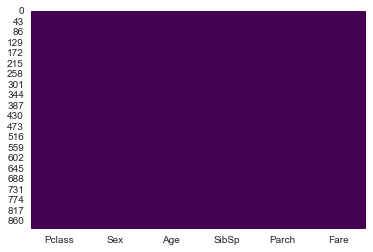

In [342]:
sns.heatmap(X.isnull(),cbar = False,cmap = 'viridis')

In [343]:
X.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [344]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

In [345]:
sex = pd.get_dummies(X['Sex'],drop_first=True)

In [346]:
sex

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[891 rows x 1 columns]

In [347]:
X = pd.concat([X,sex],axis = 1)

In [348]:
X = X.drop(['Sex'], axis = 1)

In [349]:
X.head()

Pclass   Age  SibSp  Parch     Fare  male
0       3  22.0      1      0   7.2500     1
1       1  38.0      1      0  71.2833     0
2       3  26.0      0      0   7.9250     0
3       1  35.0      1      0  53.1000     0
4       3  35.0      0      0   8.0500     1

In [350]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [351]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [352]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male']

In [353]:
class_name

[1, 0]

In [354]:
class_name = [str(int) for int in class_name]

In [355]:
class_name

['1', '0']

In [356]:
target_names = y.unique().tolist()

In [357]:
target_names

[0, 1]

In [358]:
type(X)

pandas.core.frame.DataFrame

In [359]:
X.dtypes

Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
male        uint8
dtype: object

In [360]:
y.dtypes

dtype('int64')

In [361]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

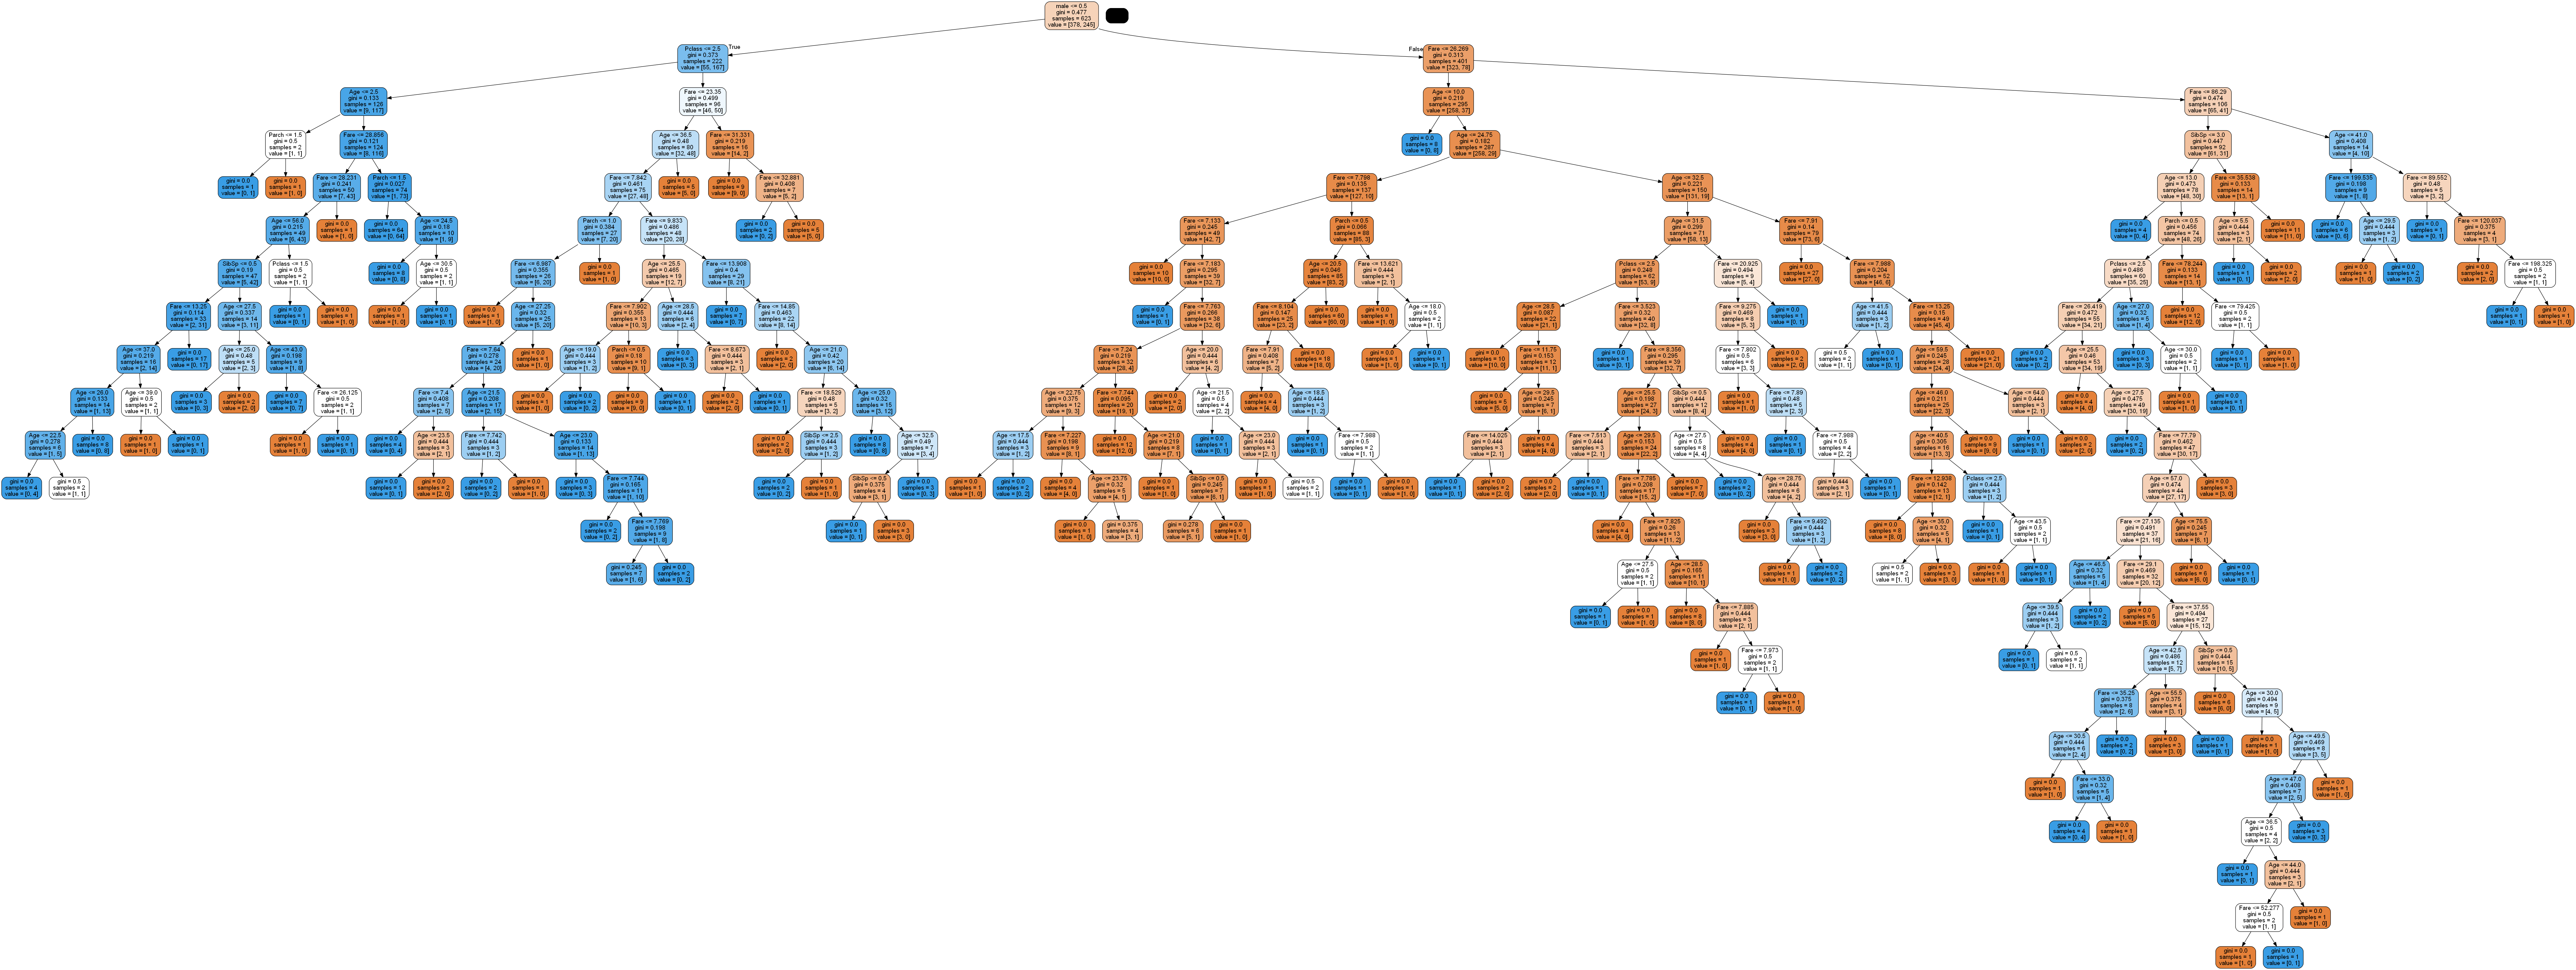

In [362]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [363]:
clf.score(x_train,y_train)

0.985553772070626

#### accuracy of our classification tree

In [364]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.746268656716418

#### we are tuning three hyperparameters right now, we are passing the different values for both parameters

In [365]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [366]:
from sklearn.model_selection import GridSearchCV

#### Performing cross validation on the Grid

In [367]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [368]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

#### Finding out what the best parameters are

In [369]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}


In [370]:
parameter_list = list(best_parameters.values())

In [371]:
parameter_list

['gini', 31, 2, 8, 'random']

In [372]:
grid_search.best_score_

0.8282193548387097

In [373]:
clf = DecisionTreeClassifier(criterion = parameter_list[0], max_depth = parameter_list[1], min_samples_leaf= parameter_list[2], min_samples_split = parameter_list[3], splitter = parameter_list[4])
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=31, min_samples_leaf=2, min_samples_split=8,
                       splitter='random')

#### Finding out Accuracy using the GridSearch Method

In [374]:
clf.score(x_test,y_test)

0.7873134328358209

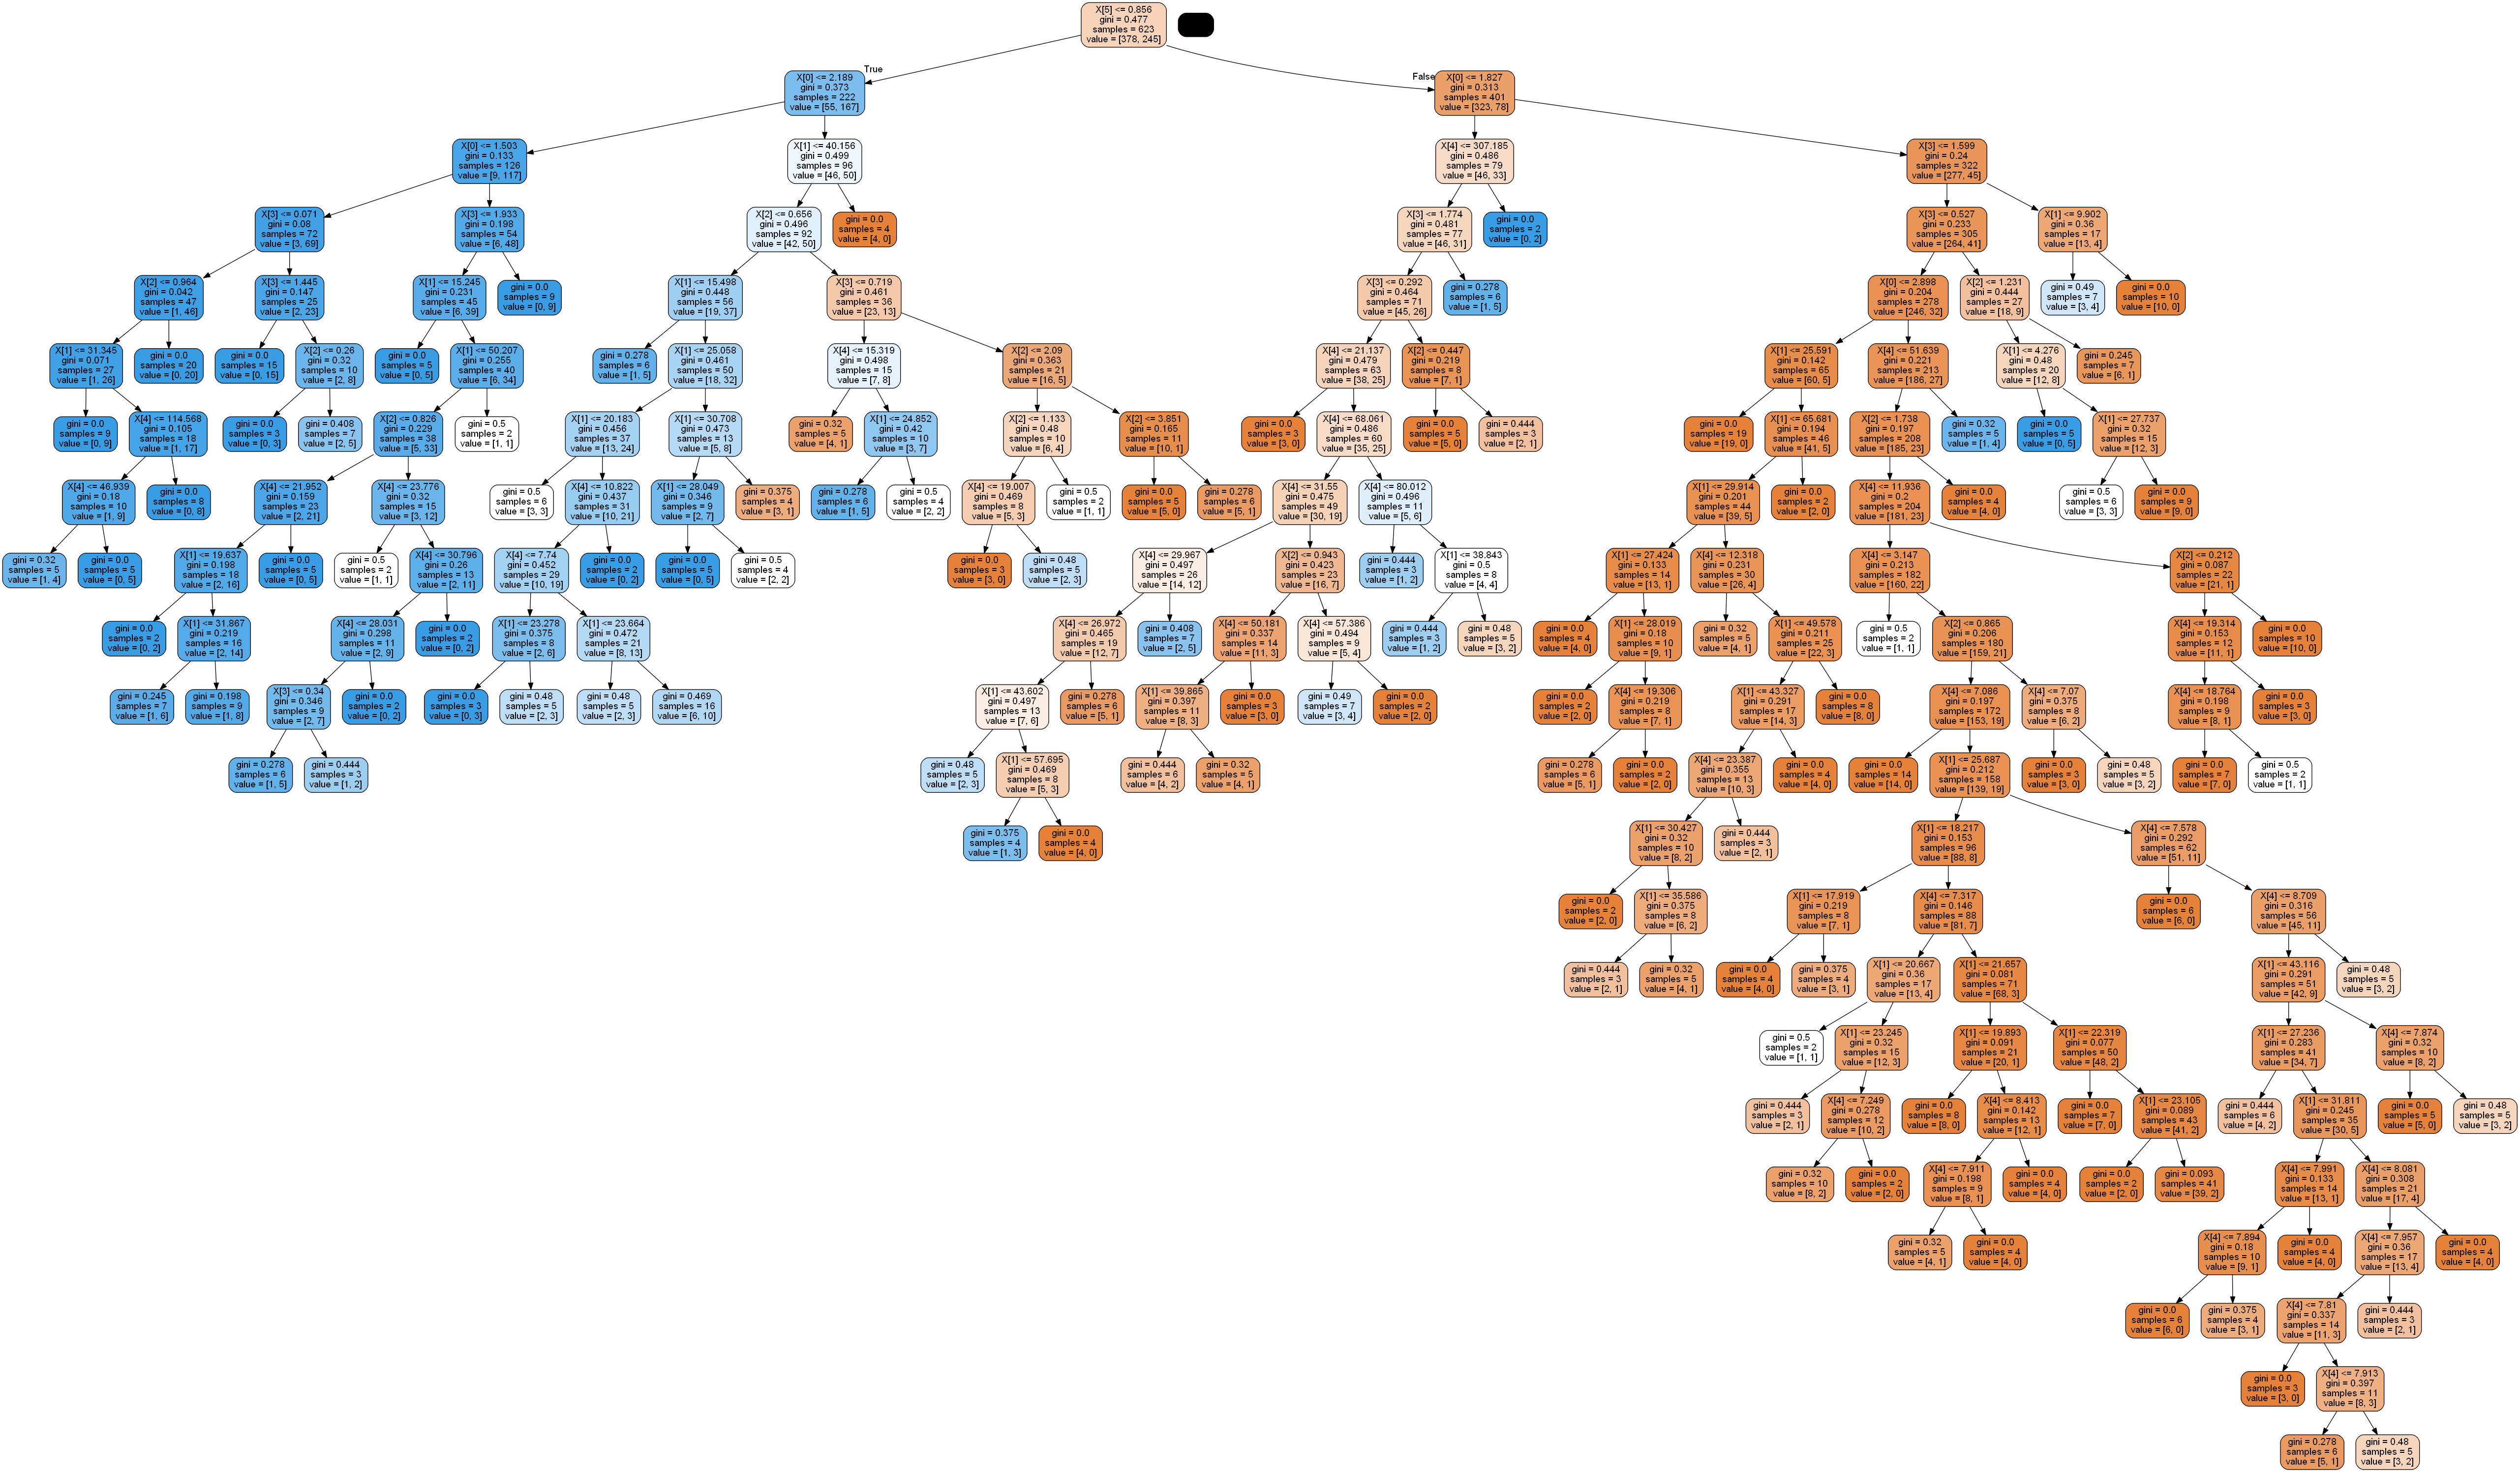

In [375]:
feature_name=list(x_train.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [376]:
print(grid_param['max_depth'])

range(2, 32)


In [377]:
y_pred = clf.predict(x_test)

In [378]:
from sklearn.metrics import classification_report

In [301]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       171
           1       0.69      0.69      0.69        97

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



#### Cost Complexity Pruning

In [379]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[:-1]
print(ccp_alphas, impurities)

clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf_dt.fit(x_train, y_train)
    clf_dts.append(clf_dt)

[0.00000000e+00 1.78348493e-05 1.07009096e-04 1.08283014e-04
 1.33761370e-04 1.42678794e-04 1.51325994e-04 2.14018192e-04
 2.34400876e-04 2.40770465e-04 2.40770465e-04 2.40770465e-04
 2.76694948e-04 2.85357589e-04 2.86875448e-04 3.11149525e-04
 3.23237804e-04 3.67843767e-04 3.80078038e-04 4.24802592e-04
 5.57813372e-04 6.50109023e-04 6.68806849e-04 6.95232299e-04
 7.22311396e-04 7.43037059e-04 7.53179405e-04 7.89192081e-04
 8.03862683e-04 1.00321027e-03 1.07009096e-03 1.43877776e-03
 2.06702784e-03 2.08233916e-03 2.09043379e-03 2.16979718e-03
 2.21303917e-03 5.19758465e-03 8.19944800e-03 1.13820377e-02
 1.58594250e-02 2.90799284e-02] [0.17448042 0.17449825 0.17460526 0.17493011 0.17506387 0.17549191
 0.17594588 0.1761599  0.17756631 0.17804785 0.17828862 0.17852939
 0.18046625 0.18103697 0.18161072 0.18285532 0.18447151 0.18520719
 0.18824782 0.18867262 0.19034606 0.19229639 0.1929652  0.20200322
 0.20272553 0.2042116  0.20571796 0.20808554 0.20969326 0.21069647
 0.21283665 0.21715299 

#### Cost Complexity Pruning Part 1: Visualize alpha

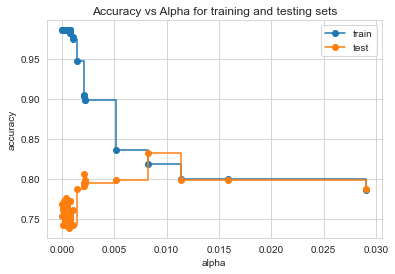

In [380]:
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
ax.legend()
plt.show()

#### Cost Complexity Pruning Part 2: Cross Validation For Finding the Best Alpha

In [381]:
from sklearn.model_selection import cross_val_score

<AxesSubplot:xlabel='tree'>

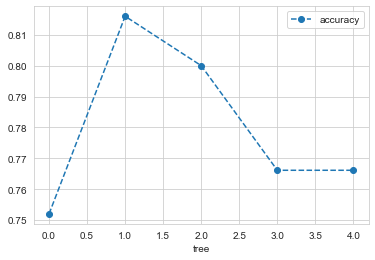

In [382]:
clf_dt = DecisionTreeClassifier(ccp_alpha=0.016)
scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

Now let's use **cross validation** to find the optimal value for `ccp_alpha`.

<AxesSubplot:xlabel='alpha'>

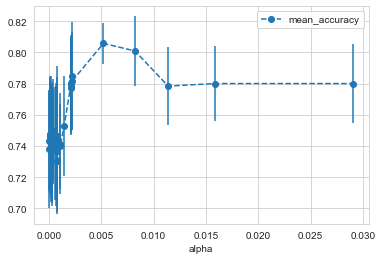

In [383]:
alpha_loop_values = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values, 
                             columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', 
                   y='mean_accuracy', 
                   yerr='std', 
                   marker='o', 
                   linestyle='--')

In [384]:
alpha_results[np.logical_and(alpha_results['alpha']> 0.0049, alpha_results['alpha']<0.0055)]

alpha  mean_accuracy       std
37  0.005198       0.805768  0.012977

In [404]:
alpha_results.head()

alpha  mean_accuracy       std
0  0.000000       0.738271  0.037873
1  0.000018       0.743123  0.032160
2  0.000107       0.746323  0.037368
3  0.000108       0.747910  0.036685
4  0.000134       0.744710  0.034789

In [386]:
ideal_ccp_alpha = alpha_results[np.logical_and(alpha_results['alpha']> 0.0049, alpha_results['alpha']<0.0055)]['alpha']
ideal_ccp_alpha

37    0.005198
Name: alpha, dtype: float64

In [387]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.005197584651838262

In [388]:
from sklearn.model_selection import cross_val_score # cross validation

In [389]:
clf_dt = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.005197584651838262)
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.005197584651838262, random_state=42)

In [390]:
y_pred=clf_dt.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7985074626865671

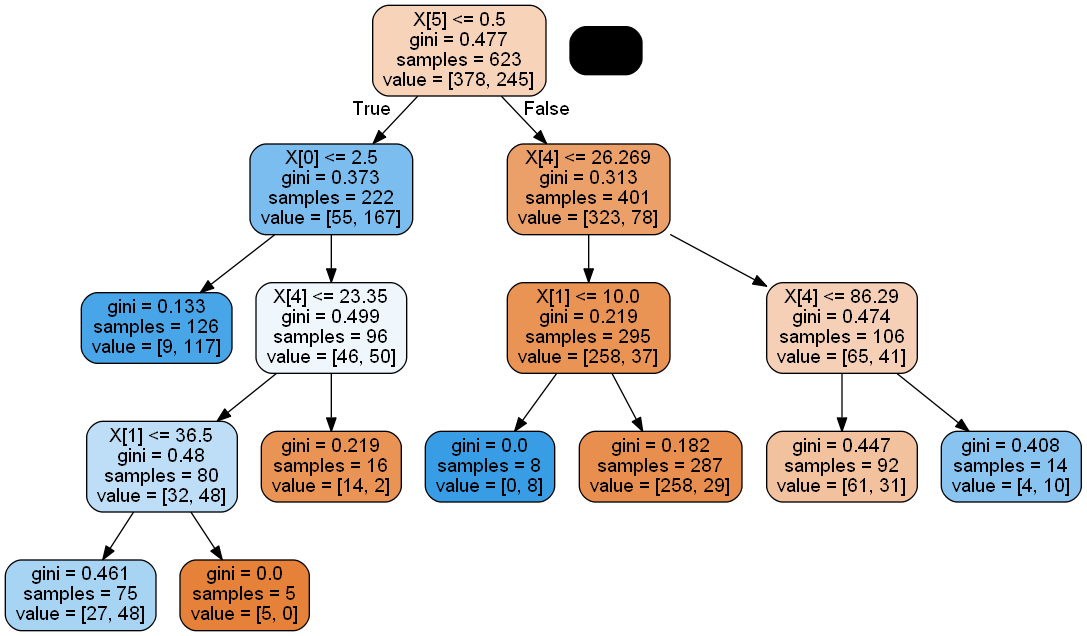

In [391]:
feature_name=list(x_test.columns)
class_name = list(y_test.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf_dt,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())

In [392]:
x_test

Pclass   Age  SibSp  Parch      Fare  male
426       2  28.0      1      0   26.0000     0
302       3  19.0      0      0    0.0000     1
383       1  35.0      1      0   52.0000     0
355       3  28.0      0      0    9.5000     1
678       3  43.0      1      6   46.9000     0
..      ...   ...    ...    ...       ...   ...
294       3  24.0      0      0    7.8958     1
519       3  32.0      0      0    7.8958     1
800       2  34.0      0      0   13.0000     1
208       3  16.0      0      0    7.7500     0
373       1  22.0      0      0  135.6333     1

[268 rows x 6 columns]

In [393]:
x_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [394]:
x_train['SibSp'].max()

8

In [395]:
clf_dt.score(x_test,y_test)

0.7985074626865671

In [396]:
clf_dt.score(x_train,y_train)

0.8362760834670947

In [397]:
y_pred=clf.predict([[2,65,0,0,200,1]]).astype(int)

In [398]:
y_pred

array([0])

#### Saving the model to .sav file for future use and which can be used in cloud deployment

In [399]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)

In [400]:
filename_2  = 'modelForPrediction.sav'
loaded_model = pickle.load(open(filename_2, 'rb')) #loading the model file from the storage

#make predictions on the test set
prediction = loaded_model.predict([[2,65,0,0,200,1]])
print('prediction is', prediction[0])

prediction is 0
